In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# 设置中文字体
plt.rcParams['font.sans-serif']=['SimHei']
#显示负号
matplotlib.rcParams['axes.unicode_minus']=False

# 1、函数语法：

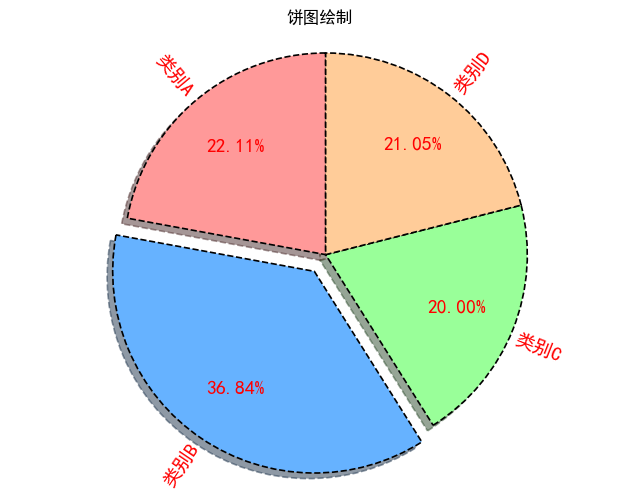

In [3]:
plt.figure(figsize=(8,6))
plt.pie(
        x=[21, 35, 19, 20],  # 饼图各扇形的数值（会自动计算占比）
        labels=['类别A', '类别B', '类别C', '类别D'],  # 每个扇形的标签文本
        colors=['#FF9999','#66B2FF','#99FF99','#FFCC99'],  # 自定义各扇形颜色
        autopct='%1.2f%%',  # 显示百分比，保留2位小数
        pctdistance=0.7,  # 百分比文本与圆心的距离（相对半径的比例）
        labeldistance=1.0,  # 标签文本与圆心的距离（相对半径的比例）
        explode=(0, 0.1, 0, 0),  # 第二个扇形（类别B）向外突出0.1单位
        shadow=True,  # 为饼图添加阴影效果，增强立体感
        startangle=90,  # 饼图起始角度设为90度（从y轴正方向开始绘制）
        # 设置扇形边框样式：黑色边框、线宽1.2、虚线样式
        wedgeprops={'edgecolor':'black', 'linewidth':1.2,'linestyle': '--'},
        # 设置文本样式：字体大小14、红色、粗体
        textprops={'fontsize': 14, 'color': 'red','weight': 'bold'},
        rotatelabels=True  # 标签文本按扇形角度旋转，避免重叠
       )

plt.title('饼图绘制')
# 保证饼图为正圆形（否则可能因坐标轴比例显示为椭圆）
plt.axis('equal') 
plt.show()

### 返回值

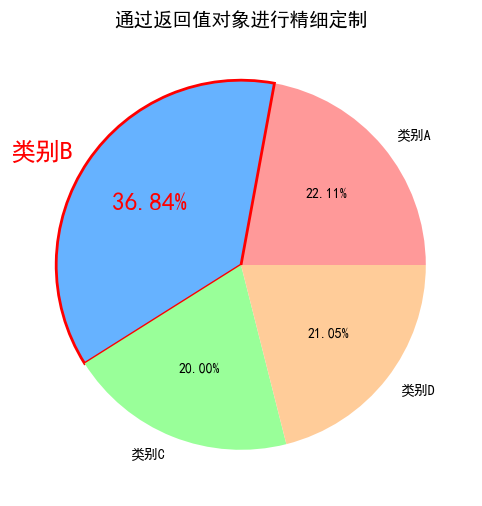

In [4]:
# 绘制饼图并获取返回值
plt.figure(figsize=(8,6))
wedges, texts, autotexts = plt.pie(
        x=[21, 35, 19, 20], 
        labels=['类别A', '类别B', '类别C', '类别D'],
        autopct='%1.2f%%',
        colors=['#FF9999','#66B2FF','#99FF99','#FFCC99']
       )

# 通过返回值对象进行精细定制
# 1. 设置“类别B”扇形的边框为红色并加粗
wedges[1].set_edgecolor('red')
wedges[1].set_linewidth(2)
# 2. 将“类别B”扇形的百分比文本的颜色设置为红色并加粗
autotexts[1].set_color('red')
autotexts[1].set_fontsize(18)
autotexts[1].set_fontweight('bold')
# 3. 将“类别B”标签的字体设置为红色并加粗
texts[1].set_fontsize(18)
texts[1].set_color('red')
texts[1].set_fontweight('bold')

plt.title('通过返回值对象进行精细定制', fontsize=14)
plt.show()

# 2、使用示例：

### 2.1 添加图例

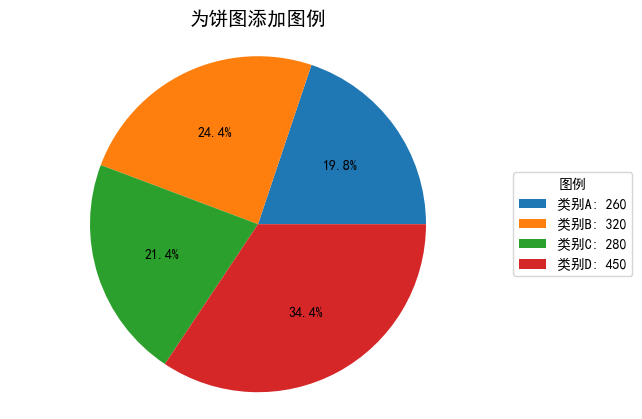

In [5]:
# 准备数据
values = [260, 320, 280, 450]  # 数据
labels = ['类别A', '类别B', '类别C', '类别D']  # 标签

# 自定义图例标签（可以包含额外信息）
legend_labels = [f'{label}: {value}' for label, value in zip(labels, values)]

# 绘制饼图，先不设置labels（避免与图例中的标签重复）
wedges, texts, autotexts = plt.pie(
    x=values,
    autopct='%1.1f%%'
)

# 添加图例
plt.legend(
    wedges,  # 将图例与饼图的扇形对象关联，确保颜色对应
    legend_labels,  # 使用自定义的图例文本
    title='图例',
    loc='center left',  # 图例在图表中的基准位置（左侧中间）

    # 调整图例位置
    # 将图例的基准点锚定到 (1, 0.5) 位置（即图表右侧中间位置）
    bbox_to_anchor=(1, 0, 0.5, 1)  
)

plt.title('为饼图添加图例', fontsize=14, pad=10)
plt.axis('equal')
plt.show()

### 2.2 绘制环形饼图

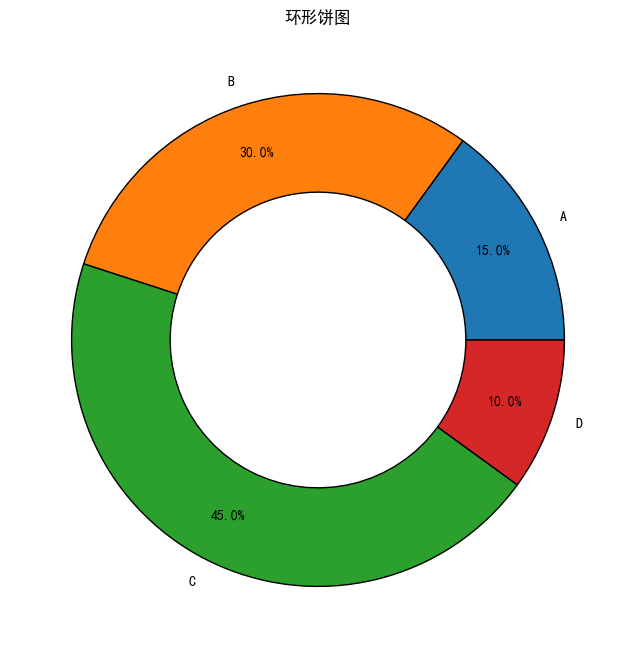

In [6]:
import matplotlib.pyplot as plt

# 数据准备
sizes = [15, 30, 45, 10]
labels = ['A', 'B', 'C', 'D']

plt.figure(figsize=(8, 8))

plt.pie(sizes, 
        labels=labels, 
        autopct='%1.1f%%',
        pctdistance=0.8,  # 百分比文本与圆心的距离（相对半径的比例）
        wedgeprops=dict(width=0.4, edgecolor='k')  # width控制环的厚度
)  

plt.title('环形饼图')
plt.show()

### 2.3 绘制多级饼图

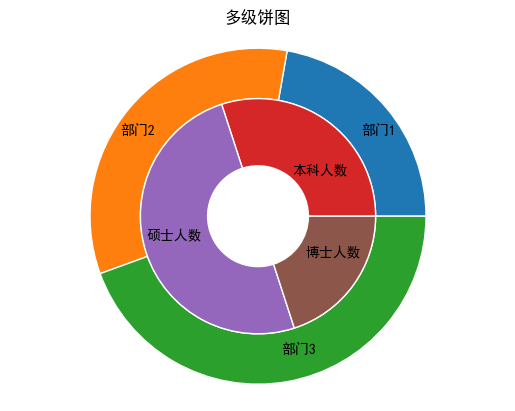

In [7]:
# 外层数据（一级分类）
outer_values = [100, 150, 200]
outer_labels = ["部门1", "部门2", "部门3"]

# 内层数据
inner_values = [30, 50, 20]
inner_labels = ["本科人数", "硕士人数", "博士人数"]

# 绘制外层饼图（环形）
plt.pie(
    outer_values,
    labels=outer_labels,
    radius=1,  # 外层半径
    labeldistance=0.8 ,
    wedgeprops={"width": 0.3, "edgecolor": "white"}  # 厚度0.3，白色边框分隔
)

# 绘制内层饼图（仅展示产品A的细分）
plt.pie(
    inner_values,
    labels=inner_labels,
    radius=1 - 0.3,  # 内层半径 = 外层半径 - 外层厚度
    wedgeprops={"width": 0.4, "edgecolor": "white"},  # 内层厚度0.2
    labeldistance=0.5
)

plt.axis("equal")  # 保证正圆形
plt.title("多级饼图")
plt.show()

### 2.4 建立饼图间的关联

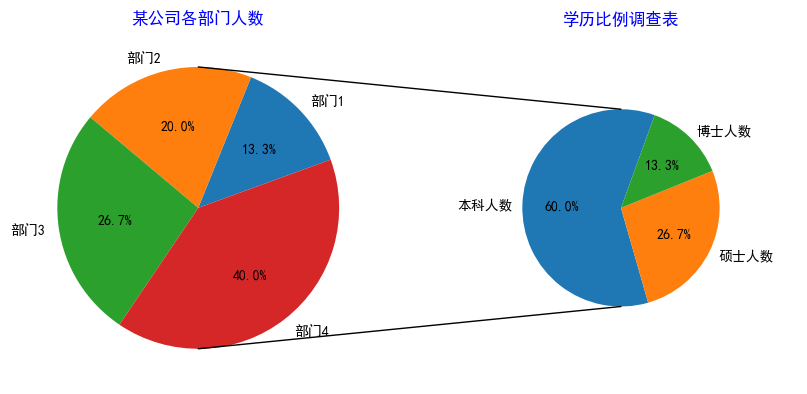

In [9]:
# 导入ConnectionPatch模块，用于在两个子图之间创建连接线
from matplotlib.patches import ConnectionPatch

# 创建画布和子图（1行2列）
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.subplots_adjust()

# 左侧饼图数据
left_values = [100, 150, 200,300]
left_labels = ["部门1", "部门2", "部门3", "部门4"]
# 右侧饼图数据
right_values = [450, 200, 100]
right_labels = ["本科人数", "硕士人数", "博士人数"]
# 在左侧子图ax1中绘制饼图
ax1.pie(left_values, autopct='%1.1f%%', startangle=20, labels=left_labels)
ax1.set_title("某公司各部门人数", color='b')
# 在右侧子图ax2中绘制饼图
ax2.pie(right_values, autopct='%1.1f%%', startangle=70, labels=right_labels, radius=0.7)
ax2.set_title("学历比例调查表", color='b')

# 创建上方连接线：连接左侧子图(0,1)位置和右侧子图(0,0.7)位置
# xyA/xyB：连接线两端在各自子图中的坐标（数据坐标系）
# coordsA/coordsB：指定使用数据坐标系
# axesA/axesB：指定连接线所属的两个子图
con_a = ConnectionPatch(xyA=(0, 1), xyB=(0, 0.7), coordsA=ax1.transData, coordsB=ax2.transData, axesA=ax1, axesB=ax2)
# 创建下方连接线：连接左侧子图(0,-1)位置和右侧子图(0,-0.7)位置
con_b = ConnectionPatch(xyA=(0, -1), xyB=(0, -0.7), coordsA=ax1.transData, coordsB=ax2.transData, axesA=ax1, axesB=ax2)

# 将两条连接线添加到右侧子图中（使连接线显示在图表上）
for con in [con_a, con_b]:
    ax2.add_artist(con)
    
plt.show()